<a href="https://colab.research.google.com/github/pankaja0285/era_v1_session10_pankaja/blob/main/CiFAR_S10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to colab and set path

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [2]:
import os

In [3]:
current_path = "/content/drive/MyDrive/ERA-V1/session_10"     # era_v1_session10_pankaja"
current_path

'/content/drive/MyDrive/ERA-V1/session_10'

In [4]:
os.chdir(current_path)
os.getcwd()

'/content/drive/MyDrive/ERA-V1/session_10'

In [6]:
!pip install git+https://github.com/albumentations-team/albumentations.git
!pip install torchsummary
!pip install torch-lr-finder
!pip install hiddenlayer

  Cloning https://github.com/albumentations-team/albumentations.git to /tmp/pip-req-build-grel3l8j
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations.git /tmp/pip-req-build-grel3l8j
  Resolved https://github.com/albumentations-team/albumentations.git to commit e3b47b3a127f92541cfeb16abbb44a6f8bf79cc8
  Preparing metadata (setup.py) ... done


In [7]:
from __future__ import print_function
import numpy as np
import pandas as pd

from utils import plot_metrics, train, test, helper
from models import model
import torch
import torch.nn as nn
from pprint import pprint

# Let's visualize some of the images
%matplotlib inline
import matplotlib.pyplot as plt

import torchvision
from torchsummary import summary
from dataloader.load_data import Cifar10DataLoader
from utils.engine import *


## Load config file

In [8]:
config = helper.process_config("./config/config.yaml")
use_cuda = torch.cuda.is_available()
helper.set_seed(config['model_params']['seed'],use_cuda)
device = torch.device("cuda" if use_cuda else "cpu")

pprint(config)

 loading Configuration of your experiment ..
{'criterion': 'CrossEntropyLoss',
 'data_augmentation': {'args': {'cutout_padding': 4,
                                'cutout_prob': 0.5,
                                'cutout_size': 8,
                                'horizontalflip_prob': 0.2,
                                'num_holes': 1,
                                'rotate_limit': 15,
                                'shiftscalerotate_prob': 0.25},
                       'type': 'CIFAR10AlbumentationS9'},
 'data_loader': {'args': {'batch_size': 512,
                          'num_workers': 2,
                          'pin_memory': True},
                 'classes': ['plane',
                             'car',
                             'bird',
                             'cat',
                             'deer',
                             'dog',
                             'frog',
                             'horse',
                             'ship',
                

In [ ]:
# save_model_dir = config['model_params']['save_model_dir']
# print(save_model_dir)
# if not os.path.exists(save_model_dir):
#     os.mkdir(save_model_dir, mode = 0o777)

**NOTE: For test purposes we can use this Net4 model block to keep improving upon and then final one what we land, we can replace in model_res.py**

In [9]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
device

device(type='cuda')

In [10]:
model_res = model.ResNet().to(device)
summary(model_res, input_size=(3, 32, 32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

## Download data and view sample images

In [11]:
exp_metrics={}
experiment_name=config['model_params']['experiment_name']
config['data_augmentation']['type'] = "CIFAR10Albumentation"
trigger_training=TriggerEngine(config)

Files already downloaded and verified
Files already downloaded and verified


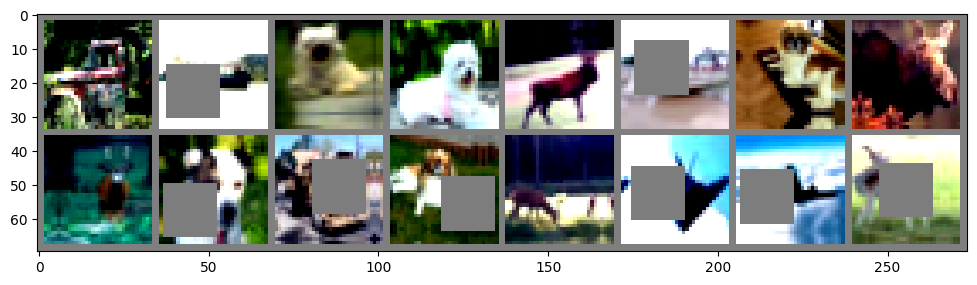

In [12]:
classes= config['data_loader']['classes']

#Get dataloaders
train_loader, test_loader = trigger_training.dataloader()
# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# # show images
helper.imshow(torchvision.utils.make_grid(images[:16]))

## Trigger training

**Resnet**

In [13]:
exp_metrics_res = {}
# set it to what we want for the current experiment
config['model_params']['experiment_name'] = 'CiFar_Model_RES'
experiment_name_res = config['model_params']['experiment_name']

config['model_params']['model_for'] = 'res'
config['model_params']['model_name'] = 'CiFar_Model_RES'
config['model_params']['save_model'] = 'Y'
trigger_training_res = TriggerEngine(config)
#Get dataloaders
train_loader, test_loader = trigger_training_res.dataloader()


Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/500 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
max_lr: 0.275
plot_lr: True
LR suggestion: steepest gradient
Suggested LR: 7.60E-02


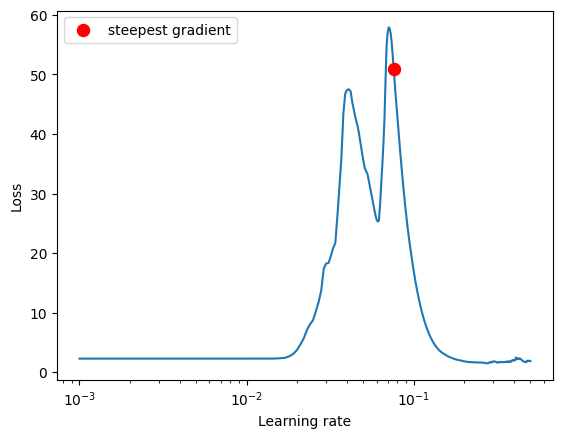

In [14]:
start_lr = 1e-3
end_lr = 0.5
lrmax = trigger_training.find_lr(model_res, train_loader, test_loader, start_lr, end_lr, plot_lr=True)

In [15]:
lrmax

0.275

In [16]:
start_lr

0.001

In [ ]:
# lrmax = 0.279
#

In [17]:
# trigger_training...
# model,train_loader,test_loader,lrmin=None,lrmax=None
# model, self.device, train_loader, optimizer,epoch, train_accuracy, train_losses, l1_factor,scheduler,criterion,lrs,self.writer,grad_clip
(exp_metrics_res[experiment_name_res]) = trigger_training.run_experiment(model_res, train_loader, test_loader, start_lr, lrmax)


ResNet(
  (prep_block): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): ReLU()
  )
  (resblock1): Sequential(
    (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(12

Loss=2.5038673877716064 Batch_id=97 LR=0.05744 Accuracy=19.42: 100%|██████████| 98/98 [00:23<00:00,  4.21it/s]



Test set: Average loss: 0.0047, Accuracy: 2252/10000 (22.52%)

Epoch 2:


Loss=1.7007372379302979 Batch_id=97 LR=0.11780 Accuracy=28.60: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]



Test set: Average loss: 0.0034, Accuracy: 3971/10000 (39.71%)

Epoch 3:


Loss=1.4085373878479004 Batch_id=97 LR=0.19231 Accuracy=42.27: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]



Test set: Average loss: 0.0028, Accuracy: 4925/10000 (49.25%)

Epoch 4:


Loss=1.1158946752548218 Batch_id=97 LR=0.25238 Accuracy=53.15: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.0027, Accuracy: 5024/10000 (50.24%)

Epoch 5:


Loss=1.1192636489868164 Batch_id=97 LR=0.27500 Accuracy=59.70: 100%|██████████| 98/98 [00:22<00:00,  4.44it/s]



Test set: Average loss: 0.0044, Accuracy: 4420/10000 (44.20%)

Epoch 6:


Loss=1.0596122741699219 Batch_id=97 LR=0.27309 Accuracy=62.97: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 0.0025, Accuracy: 6063/10000 (60.63%)

Epoch 7:


Loss=0.9789131879806519 Batch_id=97 LR=0.26747 Accuracy=65.48: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 0.0018, Accuracy: 6944/10000 (69.44%)

Epoch 8:


Loss=1.0017107725143433 Batch_id=97 LR=0.25832 Accuracy=65.80: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]



Test set: Average loss: 0.0022, Accuracy: 6171/10000 (61.71%)

Epoch 9:


Loss=0.9898546934127808 Batch_id=97 LR=0.24586 Accuracy=67.02: 100%|██████████| 98/98 [00:22<00:00,  4.28it/s]



Test set: Average loss: 0.0021, Accuracy: 6472/10000 (64.72%)

Epoch 10:


Loss=0.9322413206100464 Batch_id=97 LR=0.23046 Accuracy=67.26: 100%|██████████| 98/98 [00:24<00:00,  4.07it/s]



Test set: Average loss: 0.0023, Accuracy: 6020/10000 (60.20%)

Epoch 11:


Loss=0.9357311725616455 Batch_id=97 LR=0.21251 Accuracy=68.48: 100%|██████████| 98/98 [00:21<00:00,  4.49it/s]



Test set: Average loss: 0.0023, Accuracy: 6099/10000 (60.99%)

Epoch 12:


Loss=0.883289635181427 Batch_id=97 LR=0.19252 Accuracy=68.93: 100%|██████████| 98/98 [00:22<00:00,  4.41it/s]



Test set: Average loss: 0.0034, Accuracy: 4977/10000 (49.77%)

Epoch 13:


Loss=0.8797928690910339 Batch_id=97 LR=0.17103 Accuracy=69.28: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 0.0023, Accuracy: 6098/10000 (60.98%)

Epoch 14:


Loss=0.7687230110168457 Batch_id=97 LR=0.14863 Accuracy=70.31: 100%|██████████| 98/98 [00:23<00:00,  4.23it/s]



Test set: Average loss: 0.0028, Accuracy: 5591/10000 (55.91%)

Epoch 15:


Loss=0.9286662340164185 Batch_id=97 LR=0.12592 Accuracy=70.72: 100%|██████████| 98/98 [00:22<00:00,  4.27it/s]



Test set: Average loss: 0.0017, Accuracy: 7233/10000 (72.33%)

Epoch 16:


Loss=0.7914208769798279 Batch_id=97 LR=0.10352 Accuracy=71.35: 100%|██████████| 98/98 [00:21<00:00,  4.54it/s]



Test set: Average loss: 0.0018, Accuracy: 7010/10000 (70.10%)

Epoch 17:


Loss=0.8797961473464966 Batch_id=97 LR=0.08206 Accuracy=73.27: 100%|██████████| 98/98 [00:21<00:00,  4.52it/s]



Test set: Average loss: 0.0031, Accuracy: 5088/10000 (50.88%)

Epoch 18:


Loss=0.7979632616043091 Batch_id=97 LR=0.06210 Accuracy=74.42: 100%|██████████| 98/98 [00:24<00:00,  4.01it/s]



Test set: Average loss: 0.0015, Accuracy: 7521/10000 (75.21%)

Epoch 19:


Loss=0.6922382712364197 Batch_id=97 LR=0.04421 Accuracy=76.41: 100%|██████████| 98/98 [00:22<00:00,  4.26it/s]



Test set: Average loss: 0.0017, Accuracy: 7045/10000 (70.45%)

Epoch 20:


Loss=0.5839441418647766 Batch_id=97 LR=0.02885 Accuracy=78.06: 100%|██████████| 98/98 [00:23<00:00,  4.25it/s]



Test set: Average loss: 0.0015, Accuracy: 7492/10000 (74.92%)

Epoch 21:


Loss=0.5099977254867554 Batch_id=97 LR=0.01647 Accuracy=80.83: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]



Test set: Average loss: 0.0009, Accuracy: 8387/10000 (83.87%)

Epoch 22:


Loss=0.44668787717819214 Batch_id=97 LR=0.00738 Accuracy=83.75: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 0.0008, Accuracy: 8701/10000 (87.01%)

Epoch 23:


Loss=0.428049772977829 Batch_id=97 LR=0.00184 Accuracy=86.56: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]



Test set: Average loss: 0.0006, Accuracy: 8917/10000 (89.17%)

Epoch 24:


Loss=0.3275846838951111 Batch_id=97 LR=0.00000 Accuracy=88.14: 100%|██████████| 98/98 [00:23<00:00,  4.18it/s]



Test set: Average loss: 0.0006, Accuracy: 8938/10000 (89.38%)



In [ ]:
trigger_training_res.save_experiment(model_res, experiment_name_res, path="saved_models")

Saving the model for CiFar_Model_RES


#### Misclassification

Total wrong predictions are 1091
Files already downloaded and verified


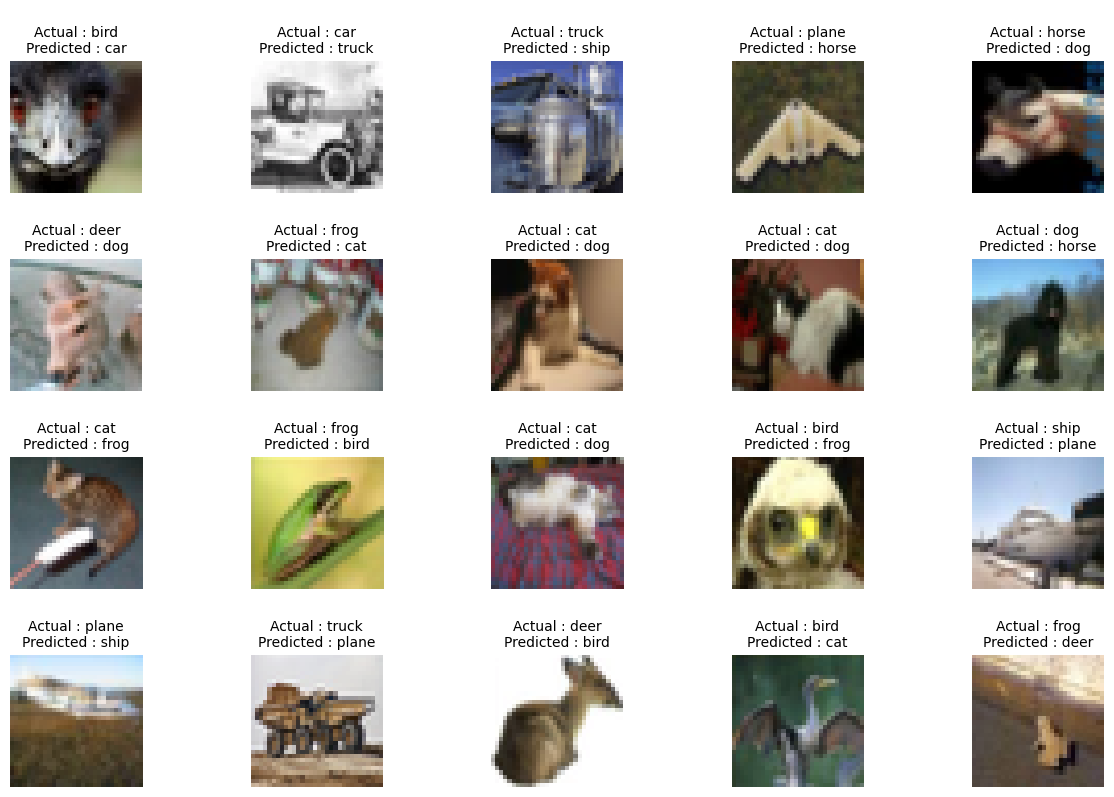

[(tensor([[[-0.9415, -0.9415, -0.9732,  ..., -0.3382, -0.3382, -0.3382],
           [-1.1796, -1.1161, -1.2114,  ..., -0.4970, -0.4811, -0.4652],
           [-1.2114, -1.1161, -1.2272,  ..., -0.7510, -0.7669, -0.7510],
           ...,
           [ 0.4396,  0.0428, -0.7192,  ...,  0.9317,  0.9159,  0.9000],
           [ 0.5507,  0.2650, -0.4017,  ...,  0.9317,  0.9317,  0.9159],
           [ 0.6301,  0.4396, -0.0842,  ...,  0.9317,  0.9317,  0.9159]],
  
          [[-0.8045, -0.8367, -0.9011,  ..., -0.4180, -0.4180, -0.4180],
           [-1.0622, -1.0300, -1.1588,  ..., -0.5790, -0.5629, -0.5468],
           [-1.1266, -1.0461, -1.1910,  ..., -0.8689, -0.8850, -0.8689],
           ...,
           [ 0.5323,  0.0974, -0.7079,  ...,  0.9833,  0.9672,  0.9511],
           [ 0.6611,  0.3551, -0.3857,  ...,  1.0638,  1.0477,  1.0316],
           [ 0.7739,  0.5323, -0.0475,  ...,  1.1282,  1.1121,  1.0960]],
  
          [[-0.4477, -0.4927, -0.5826,  ..., -0.4927, -0.4927, -0.4927],
           

In [ ]:
model_res2 = torch.load(f'./saved_models/{experiment_name_res}.pt')
model_res2.eval()
trigger_training_res.wrong_predictions(model_res2,test_loader, 20)


### Plots for Validation Loss and Accuracy

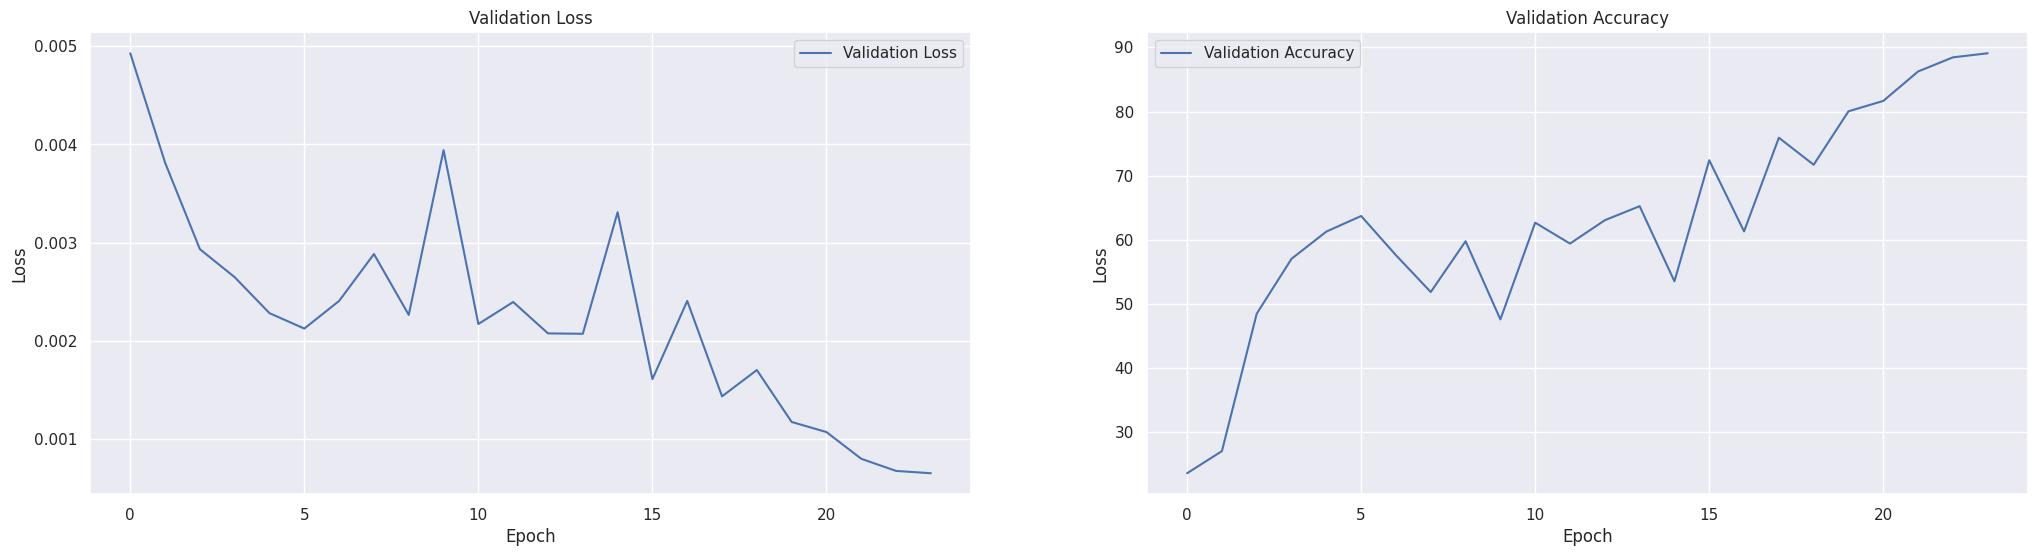

In [ ]:
plot_metrics.plot_metrics(exp_metrics_res[experiment_name_res])

### Accuracy for each class

In [ ]:
helper.class_level_accuracy(model_res, test_loader, device, classes)

Accuracy of plane : 92 %
Accuracy of   car : 95 %
Accuracy of  bird : 83 %
Accuracy of   cat : 74 %
Accuracy of  deer : 89 %
Accuracy of   dog : 82 %
Accuracy of  frog : 92 %
Accuracy of horse : 92 %
Accuracy of  ship : 93 %
Accuracy of truck : 93 %
